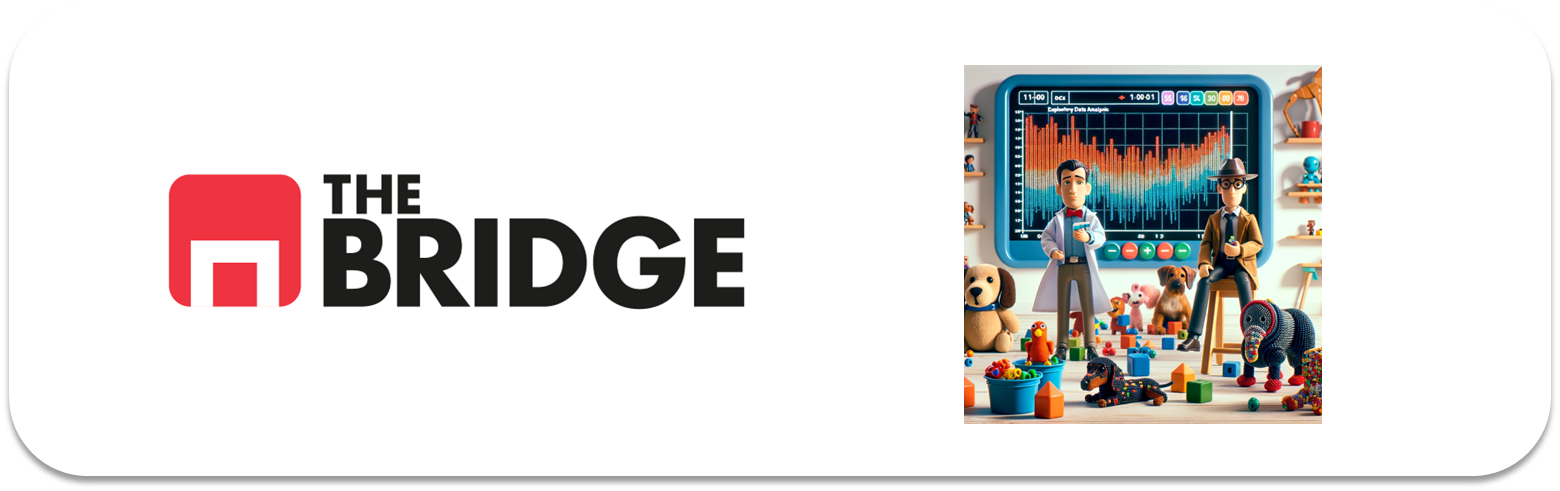

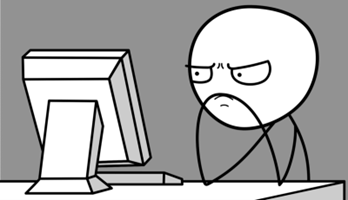

Para ejercitarte y afianzar lo aprendido sobre análisis multivariante, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import bootcampviztools as viz
import datascience as ds


### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [2]:
admisiones = pd.read_csv('./data/admission_data.csv',
                         index_col=0)
admisiones.drop(columns=['Year'], inplace=True)
admisiones

,Major,Gender,Admission
0,School of Medicine,F,Rejected
1,Department of Economics,M,Accepted
2,Other,F,Accepted
3,Other,M,Accepted
4,Other,M,Rejected
...,...,...,...
12758,Other,M,Accepted
12759,Department of Mechanical Engineering,M,Accepted
12760,Other,F,Rejected
12761,Other,M,Rejected


### Ejercicio 2

Realiza los análisis multivariante que consideres necesarios para contestar apoyándote en los datos a las preguntas: 
- ¿Existe algún departamenteo específico donde pudieramos hablar de discriminación?
- ¿Están estos resultados en consonancia con lo obtenido en el análisis bivariante de admisiones y género? 

 -------------- 

Paso 0:  Primero ver sus frecuencias individuales


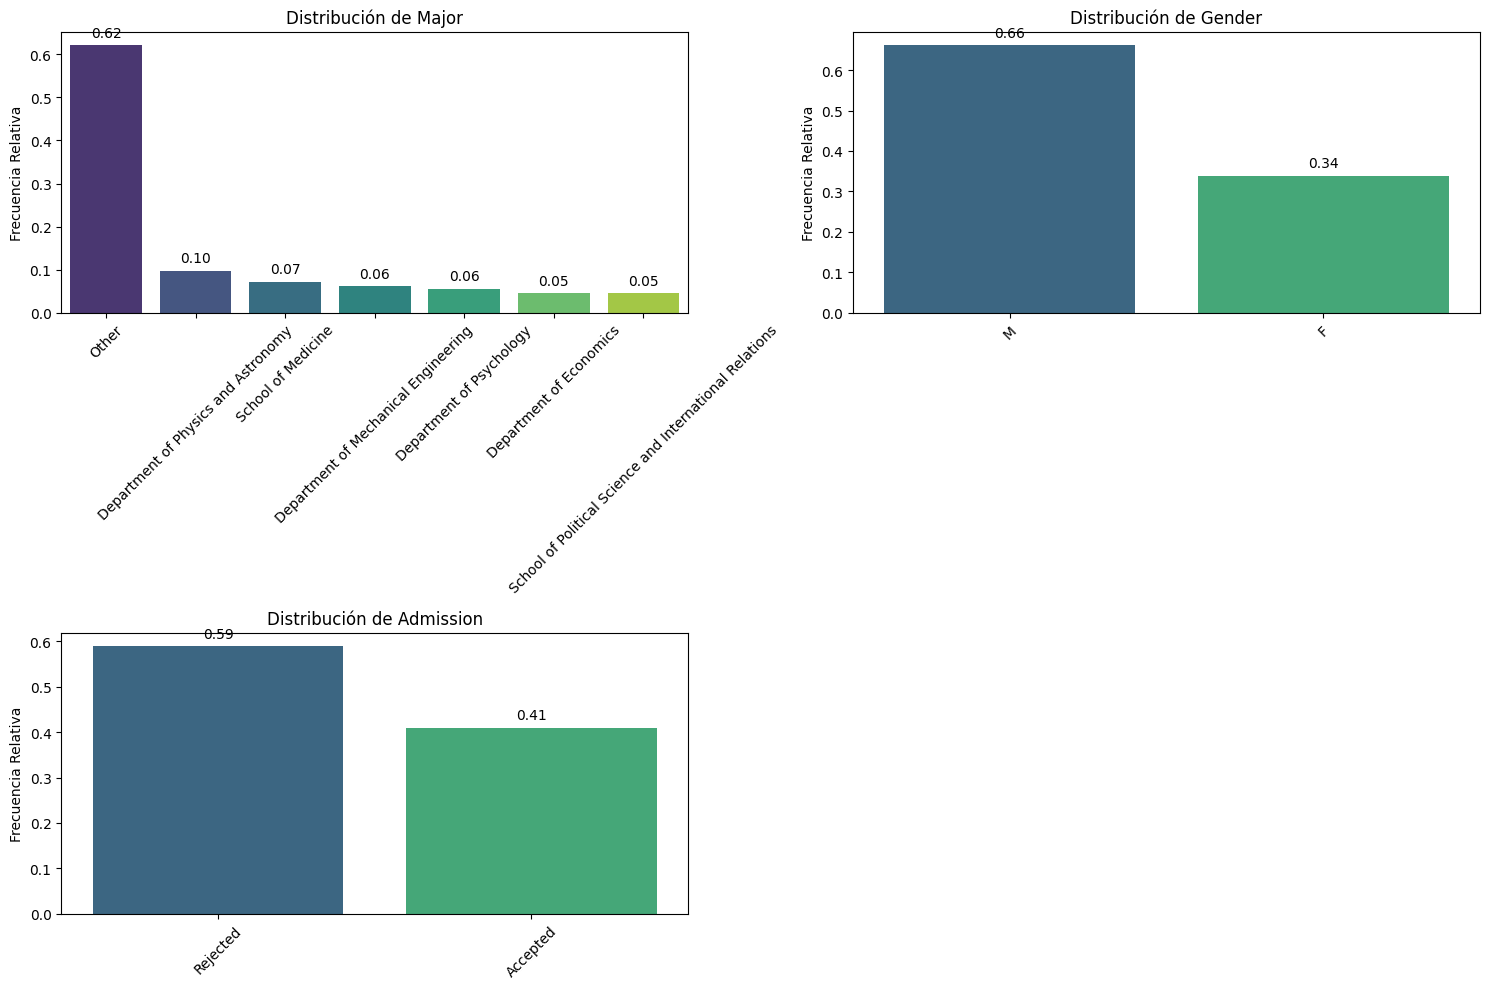

 -------------- 

Paso 1:  Escojo la variable directora: Gender
 -------------- 

Paso 2: Muestreo bivariante de cada una de otras dos variables


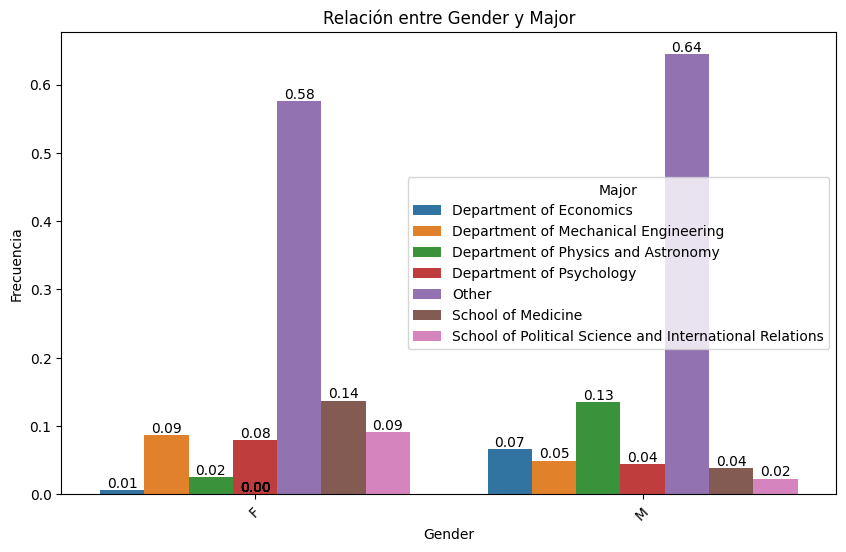

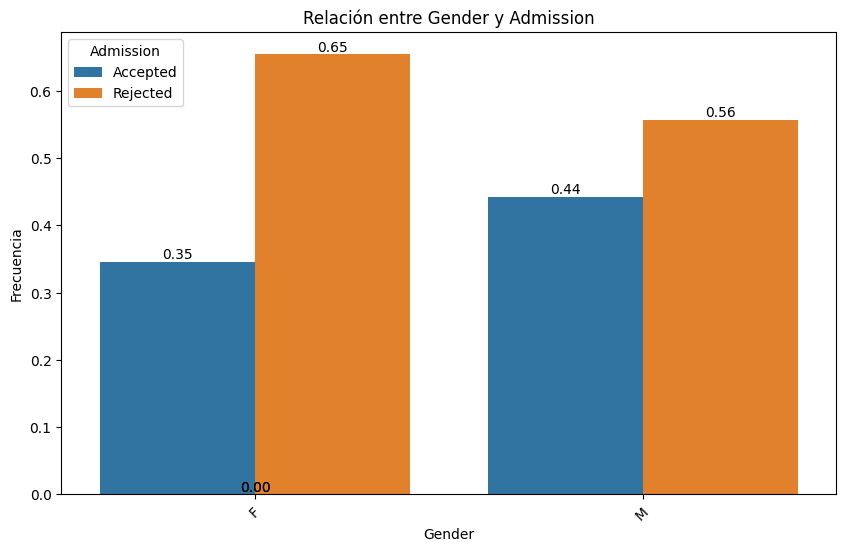

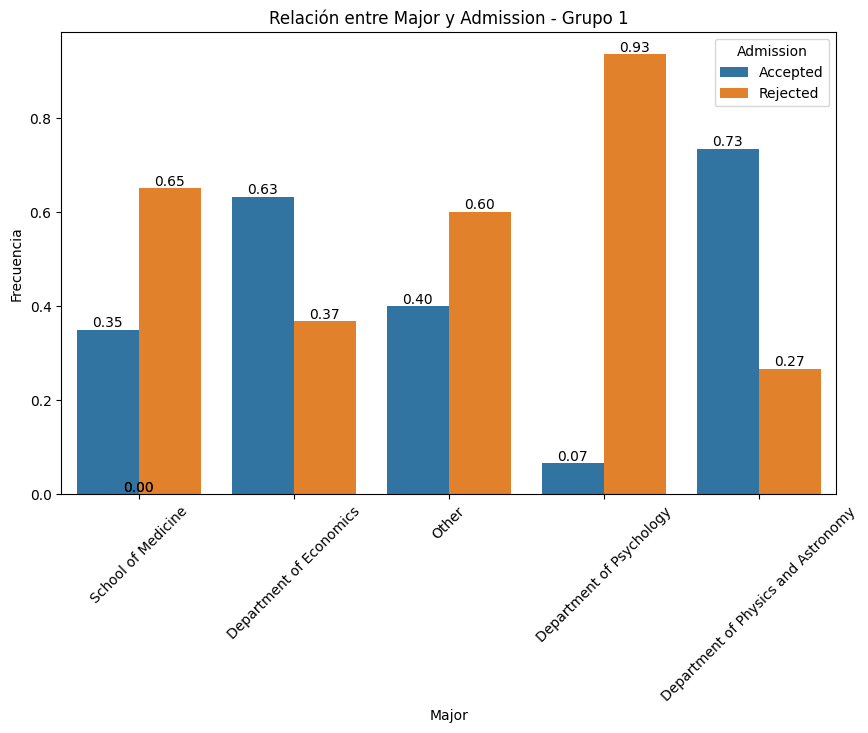

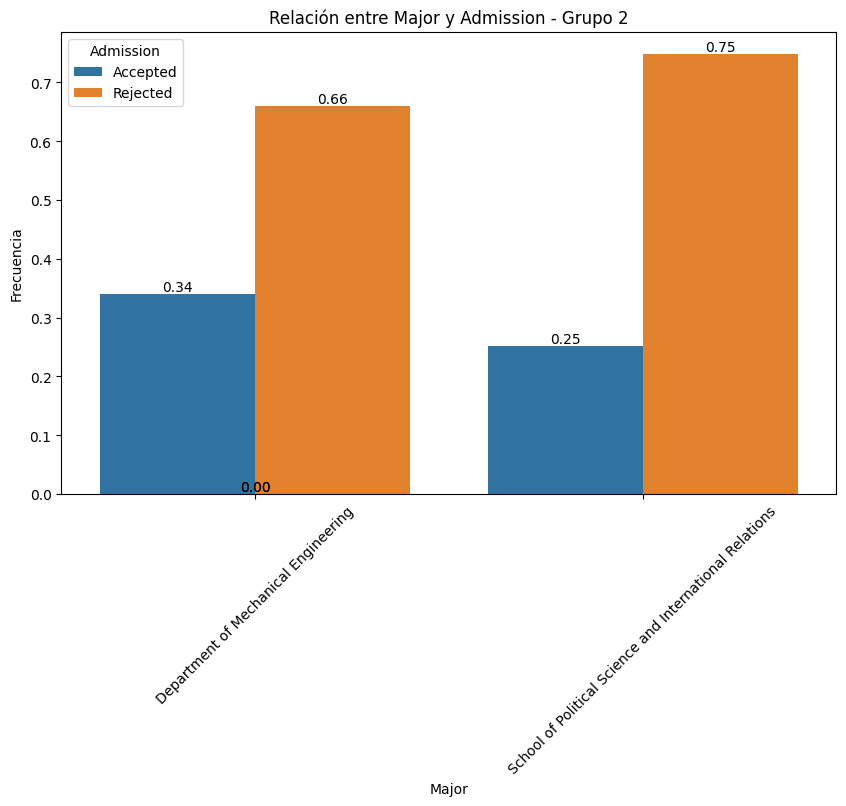

 -------------- 

Paso 3: Dividir el dataset en tandos subdatasets como valores de "Gender": 2
{'F':                                       Major Admission
0                        School of Medicine  Rejected
2                                     Other  Accepted
6                  Department of Psychology  Accepted
10                                    Other  Rejected
15                                    Other  Rejected
...                                     ...       ...
12744  Department of Mechanical Engineering  Accepted
12749                                 Other  Rejected
12755                                 Other  Rejected
12757                                 Other  Rejected
12760                                 Other  Rejected

[4321 rows x 2 columns], 'M':                                       Major Admission
1                   Department of Economics  Accepted
3                                     Other  Accepted
4                                     Other  Rejected
5   

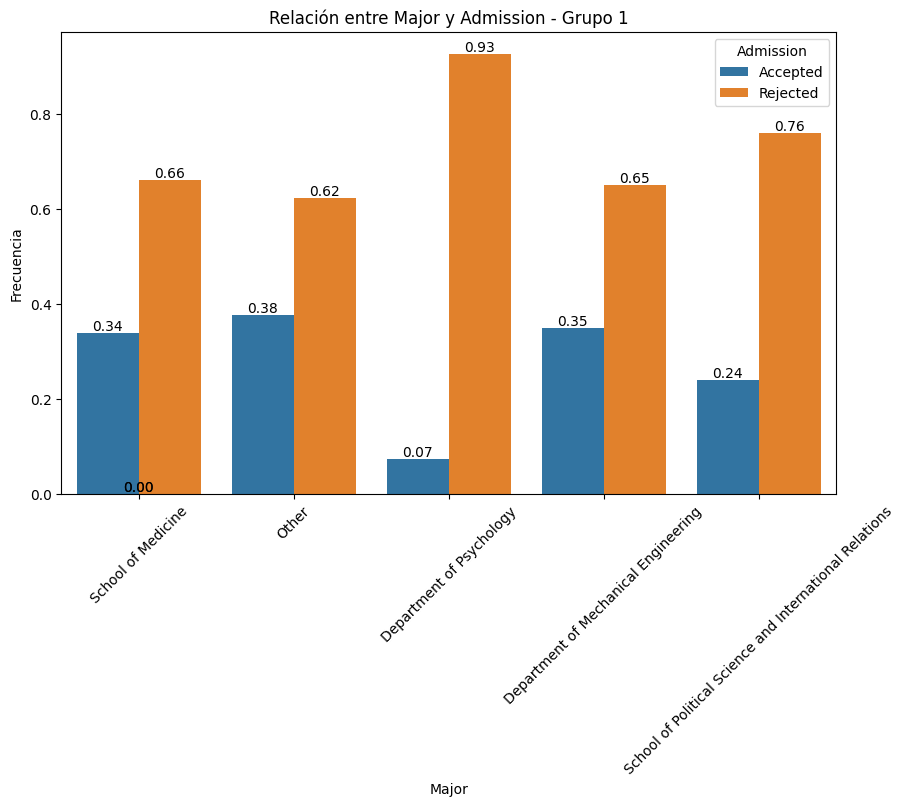

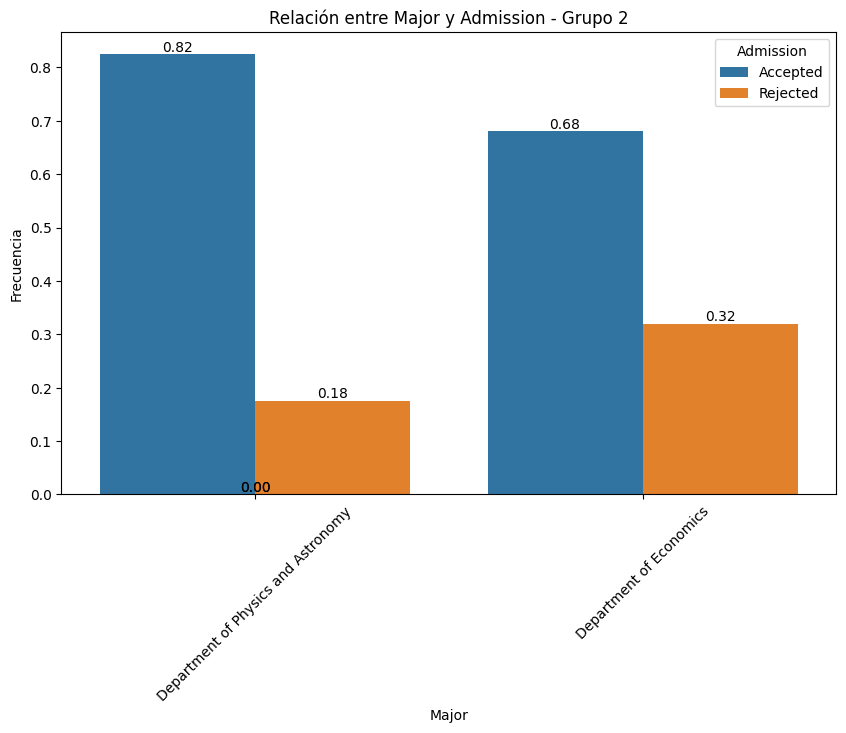

Sexo: M:


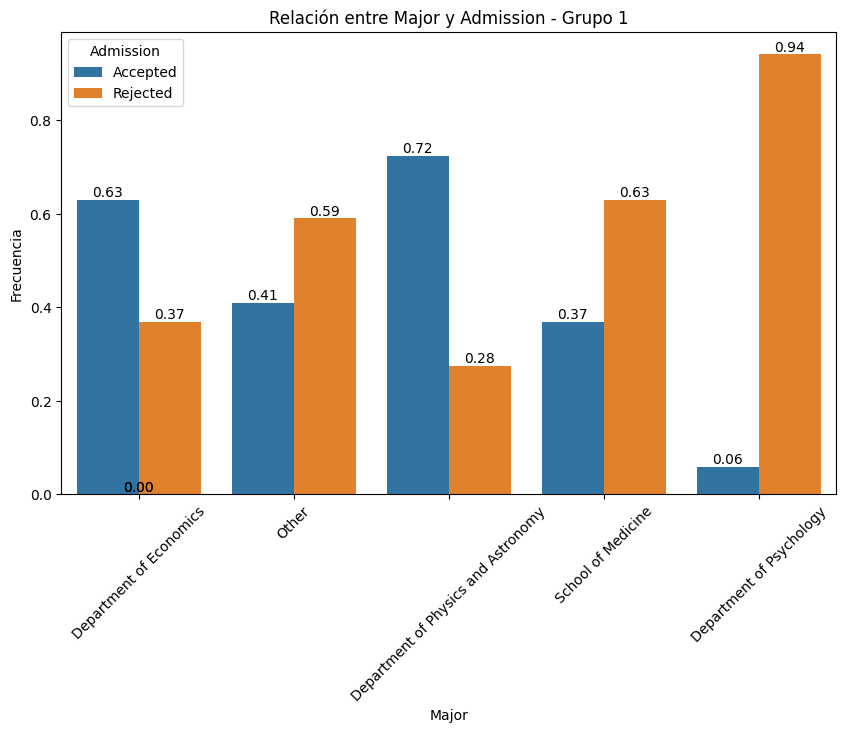

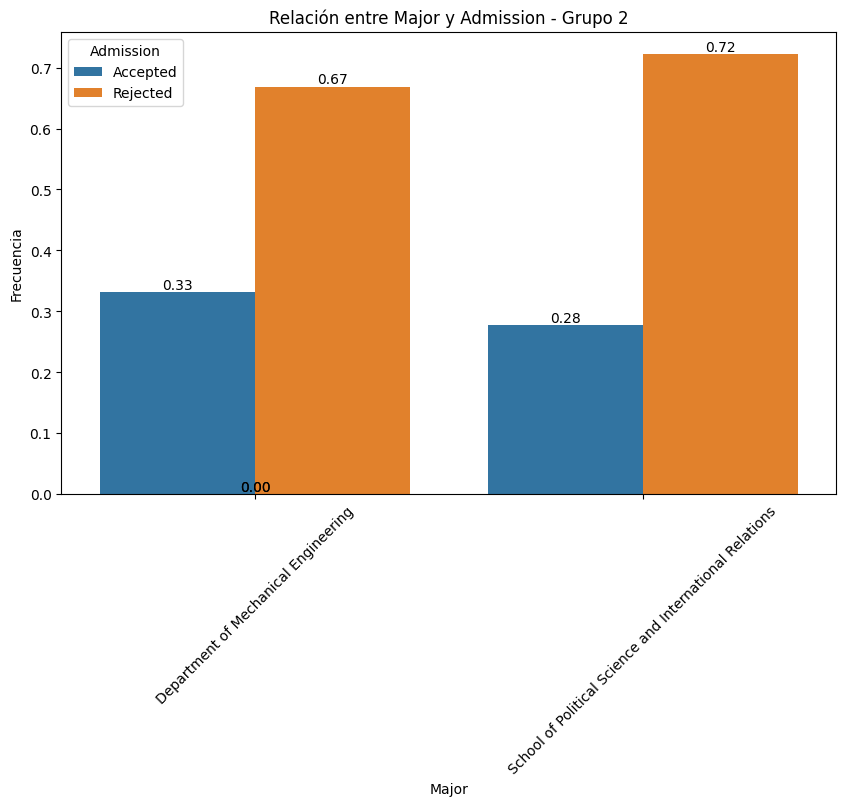

In [3]:
print(' -------------- \n')
print('Paso 0:  Primero ver sus frecuencias individuales')
viz.pinta_distribucion_categoricas(admisiones, ['Major', 'Gender', 'Admission'], relativa=True)

# 1. Escojo la variable directora: Gender
print(' -------------- \n')
print('Paso 1:  Escojo la variable directora: Gender')

# 2. Muestreo bivariante de cada una de otras dos variables
print(' -------------- \n')
print('Paso 2: Muestreo bivariante de cada una de otras dos variables')
viz.plot_categorical_relationship_fin(admisiones,"Gender","Major", relative_freq= True)
viz.plot_categorical_relationship_fin(admisiones,"Gender","Admission", relative_freq= True)
viz.plot_categorical_relationship_fin(admisiones,"Major","Admission", relative_freq= True)

# 3. Dividir el dataset en tandos subdatasets como valores de "Gender": 2
print(' -------------- \n')
print('Paso 3: Dividir el dataset en tandos subdatasets como valores de "Gender": 2')
columnas = ['Major', 'Gender', 'Admission'] 
col_directora = "Gender"

col_1 = [col for col in columnas if col != col_directora][0]    # Major
col_2 = [col for col in columnas if col != col_directora][1]    # Admission

diccionario_multivariante = {}
for valor in admisiones[col_directora].unique():
    diccionario_multivariante[valor] = admisiones.loc[admisiones[col_directora] == valor, [col_1, col_2]]

print(diccionario_multivariante)  # El orden es porque quiero ver para cada carrera como es la distribución de admisión


# 4. Hago un análisis bivariante para cada subdataset y comparo todo
print(' -------------- \n')
print('Paso 4: Hago un análisis bivariante para cada subdataset y comparo todo')
for valor, df_datos in diccionario_multivariante.items():
    print(f"Sexo: {valor}:")
    viz.plot_categorical_relationship_fin(df_datos, col_1, col_2, relative_freq= True)

- Para responder a las preguntas del enunciado creo que tendría más sentido usar como varaible directora: "MAJOR" porque va a facilitar la lectura

 -------------- 

Paso 0:  Primero ver sus frecuencias individuales


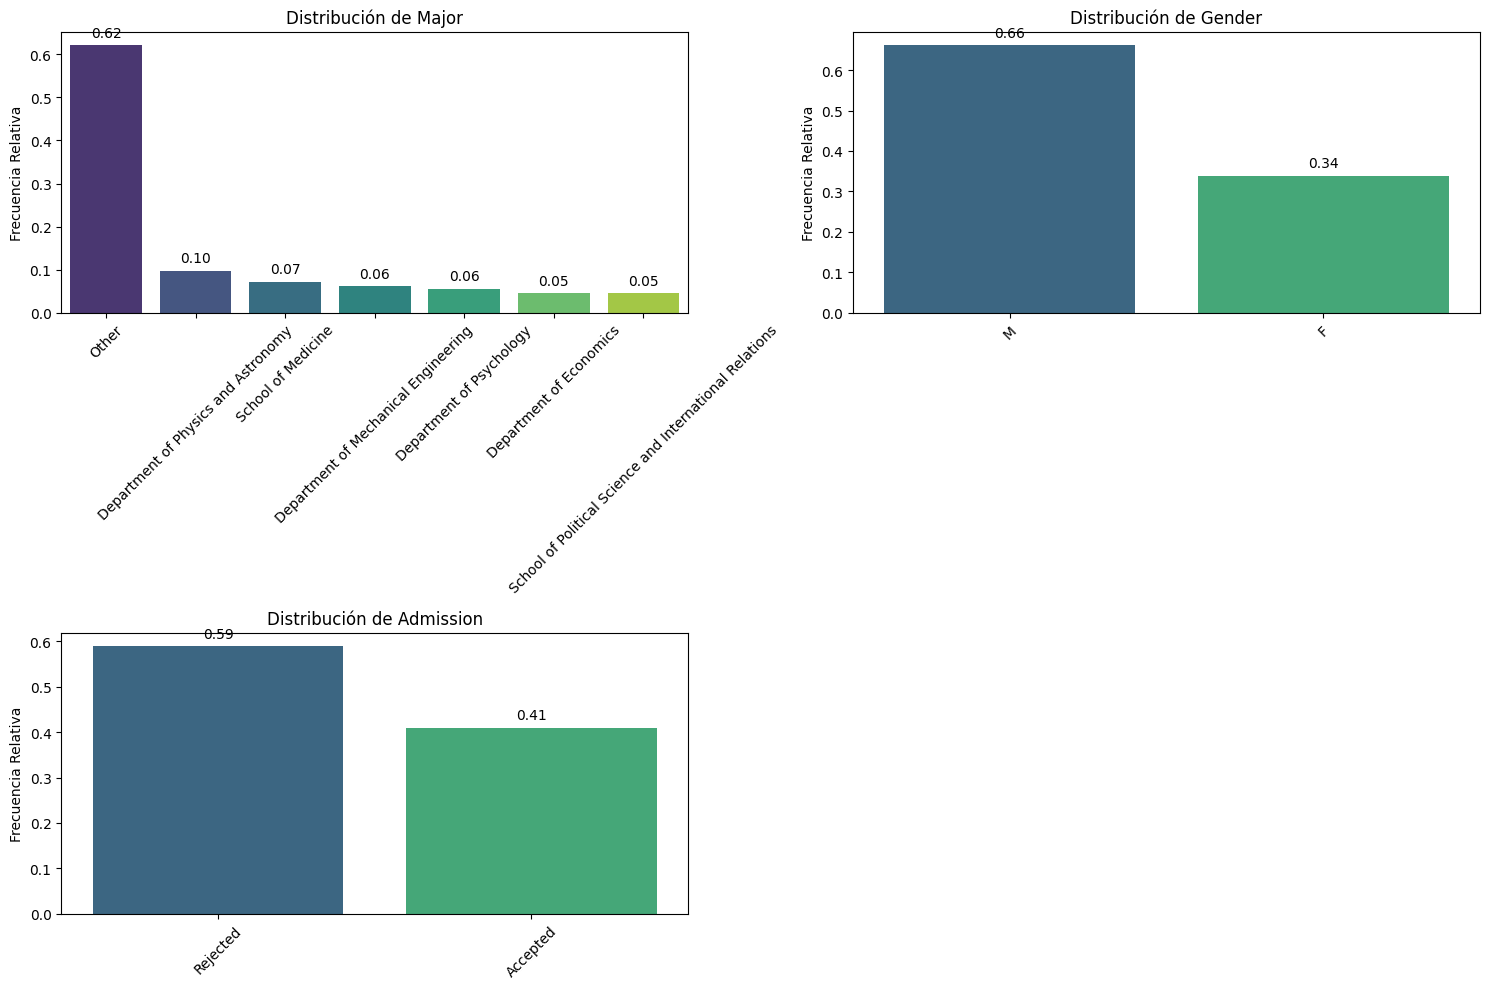

 -------------- 

Paso 1:  Escojo la variable directora: MAJOR
 -------------- 

Paso 2: Muestreo bivariante de cada una de otras dos variables


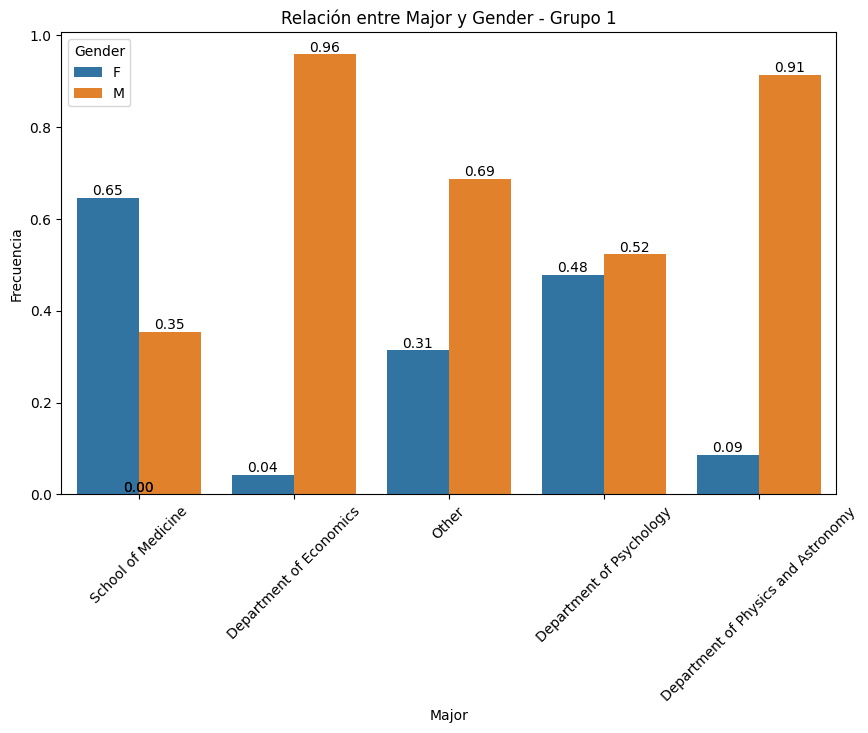

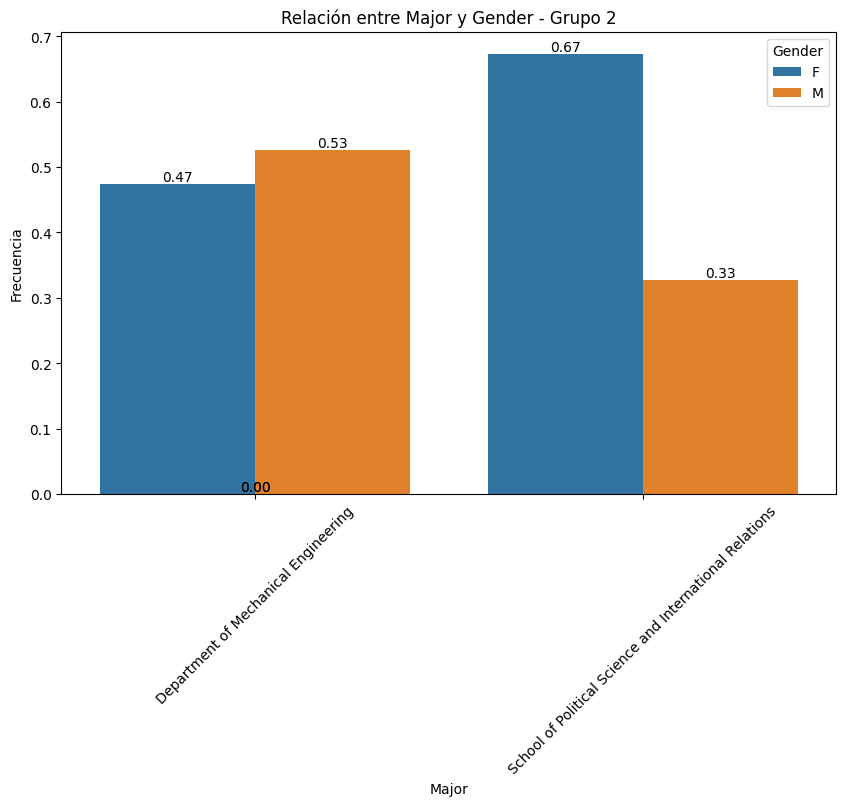

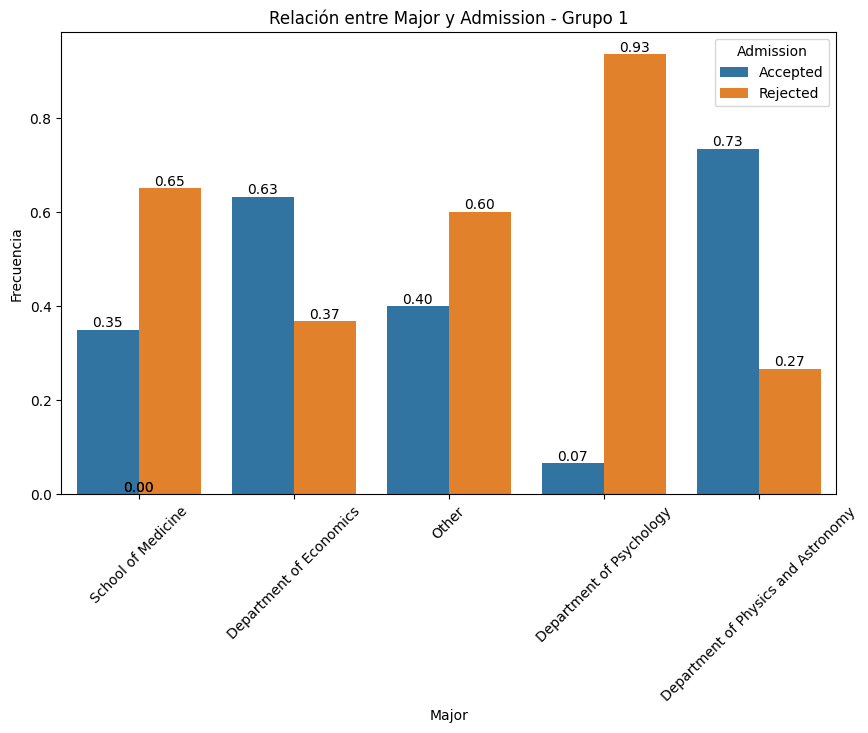

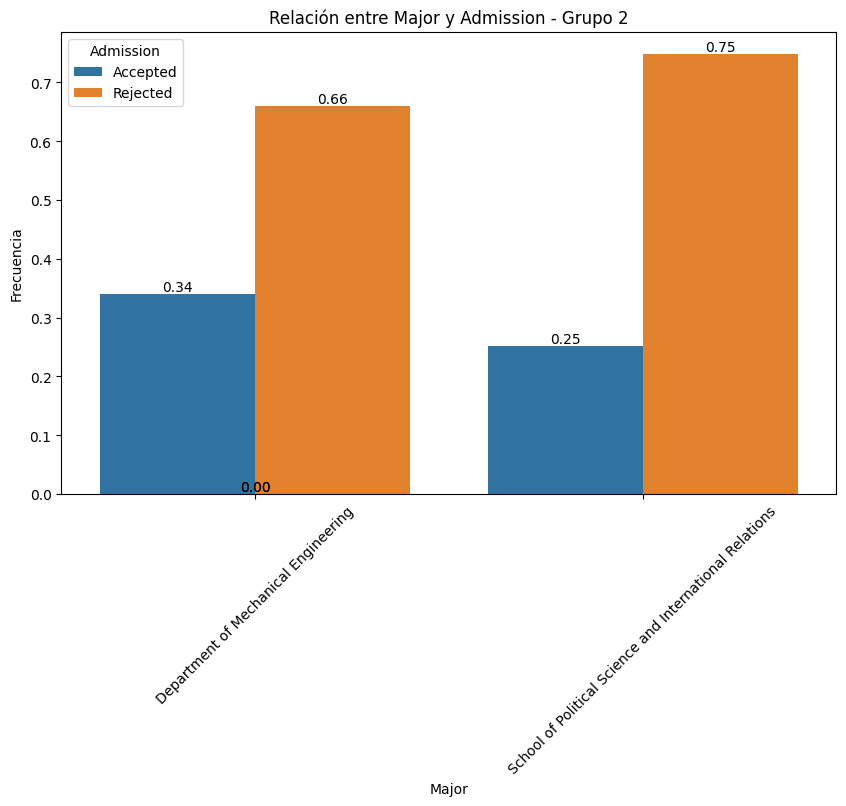

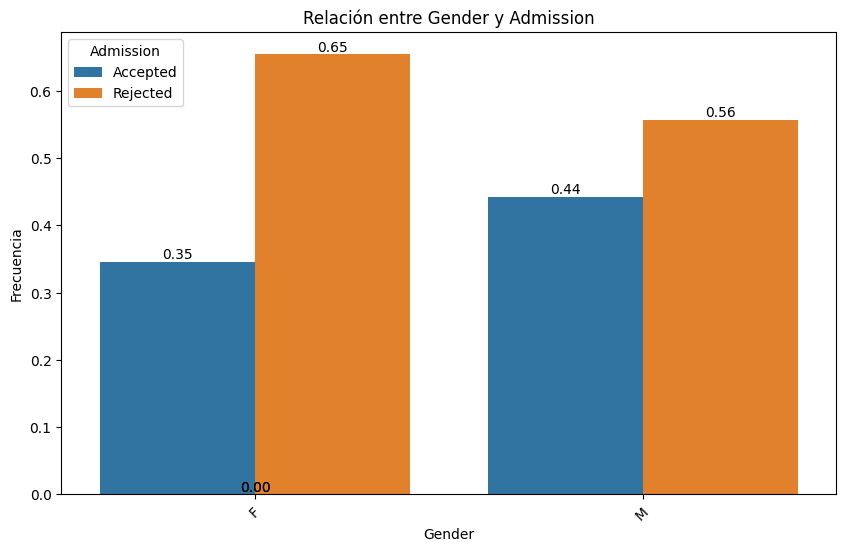

 -------------- 

Paso 3: Dividir el dataset en tandos subdatasets como valores de "Major": 7
{'School of Medicine':       Gender Admission
0          F  Rejected
12         M  Rejected
21         M  Accepted
22         F  Rejected
28         M  Rejected
...      ...       ...
12644      F  Rejected
12686      F  Rejected
12700      F  Accepted
12709      F  Rejected
12736      M  Accepted

[918 rows x 2 columns], 'Department of Economics':       Gender Admission
1          M  Accepted
11         M  Accepted
67         M  Rejected
76         M  Accepted
103        M  Accepted
...      ...       ...
12663      M  Accepted
12673      M  Accepted
12688      M  Accepted
12732      M  Rejected
12743      F  Accepted

[585 rows x 2 columns], 'Other':       Gender Admission
2          F  Accepted
3          M  Accepted
4          M  Rejected
5          M  Rejected
7          M  Accepted
...      ...       ...
12757      F  Rejected
12758      M  Accepted
12760      F  Rejected
12761      M  R

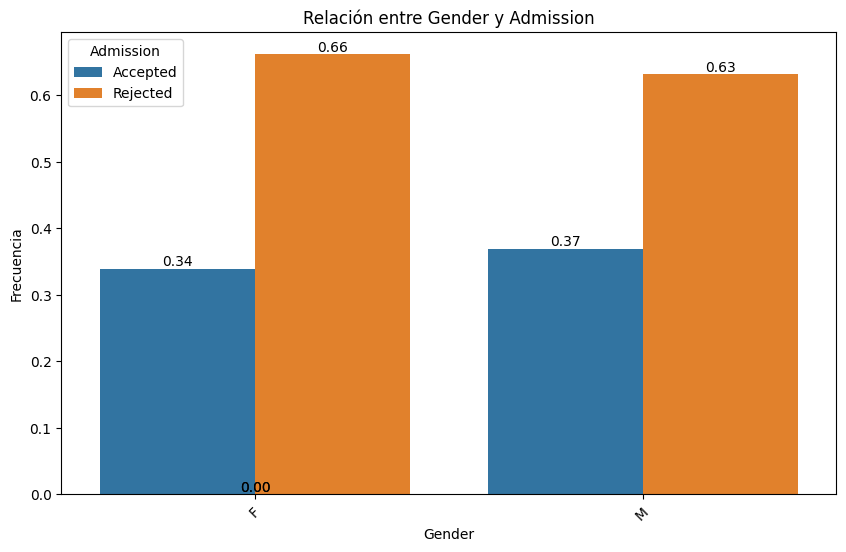

Department: Department of Economics:


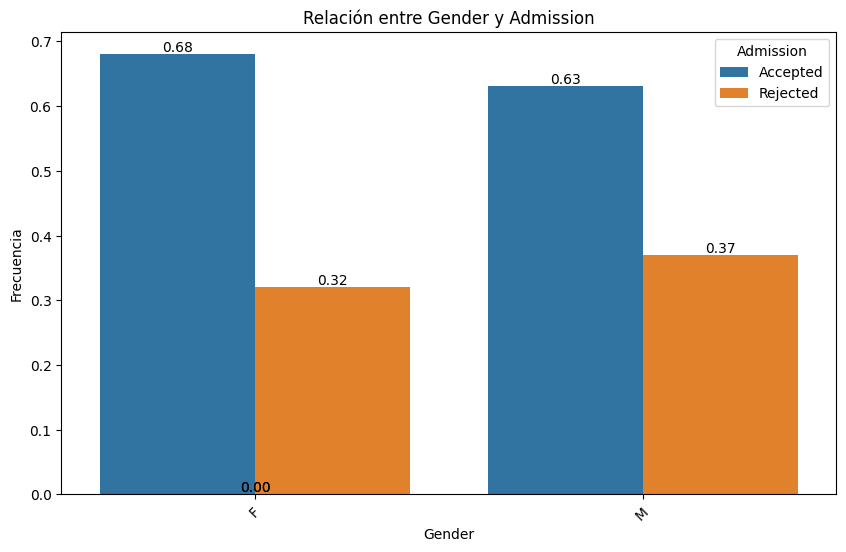

Department: Other:


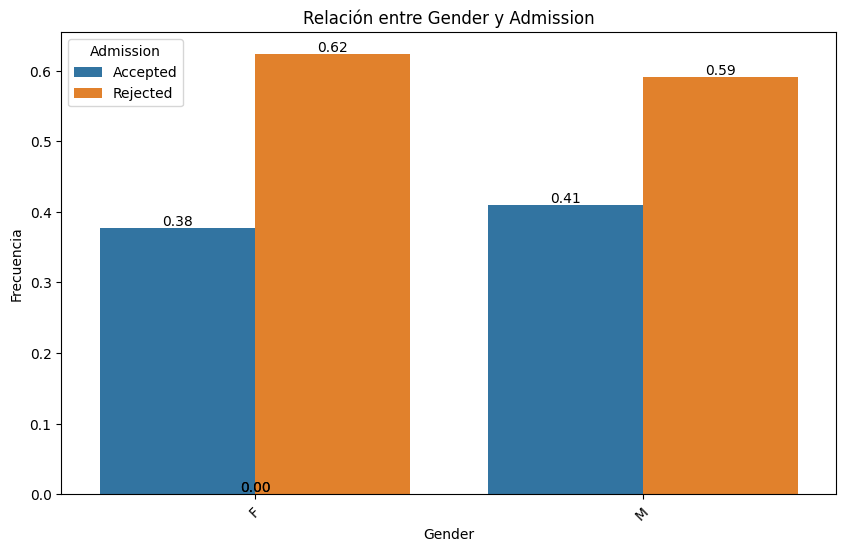

Department: Department of Psychology:


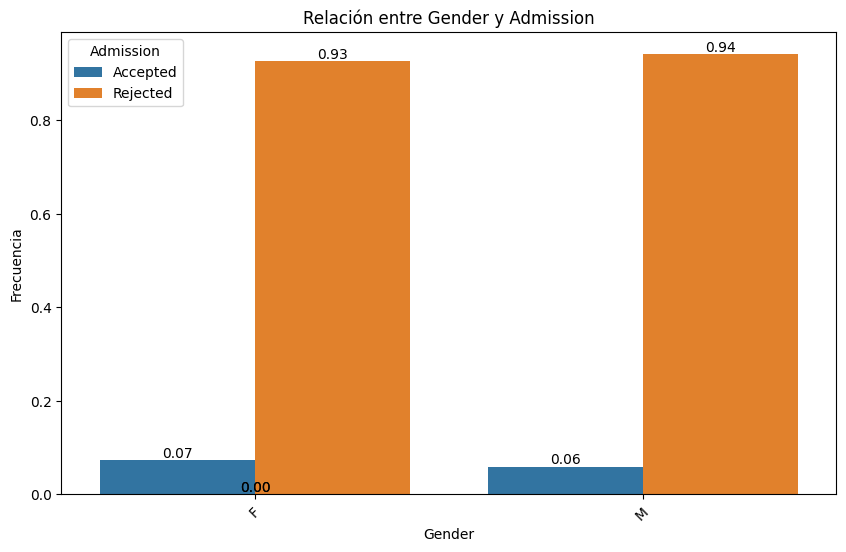

Department: Department of Physics and Astronomy:


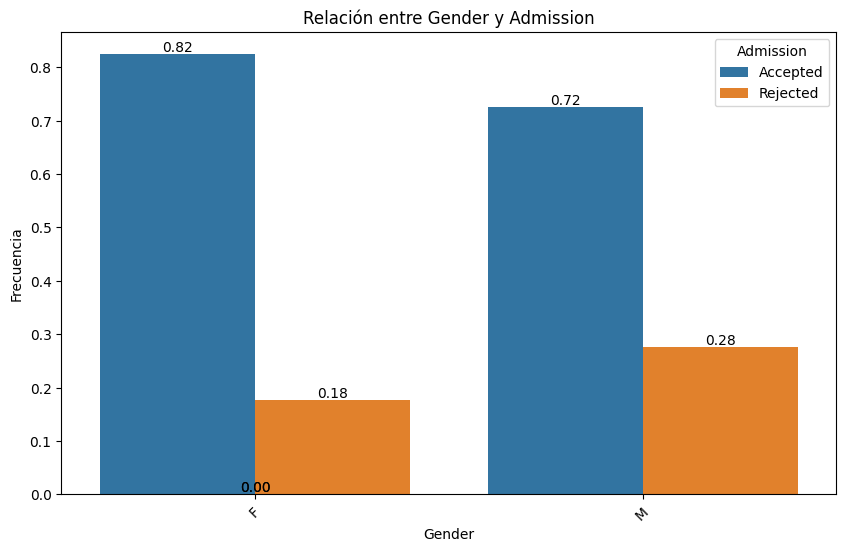

Department: Department of Mechanical Engineering:


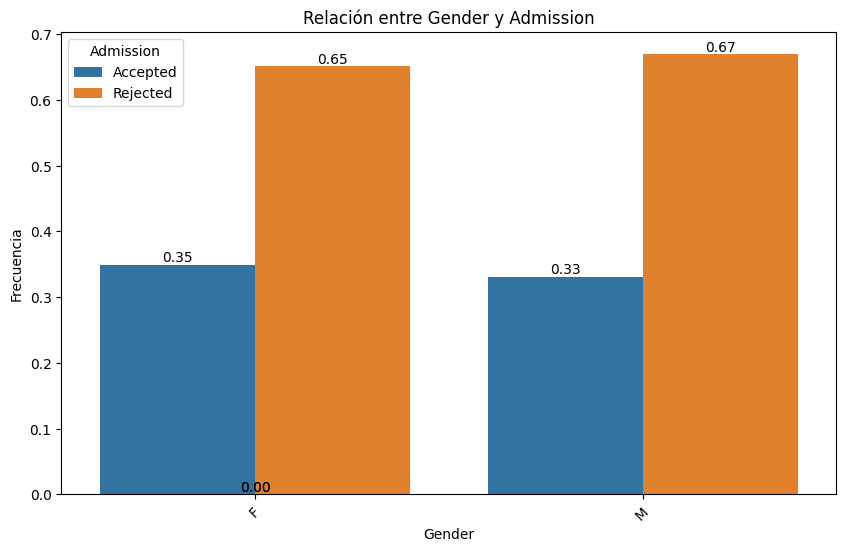

Department: School of Political Science and International Relations:


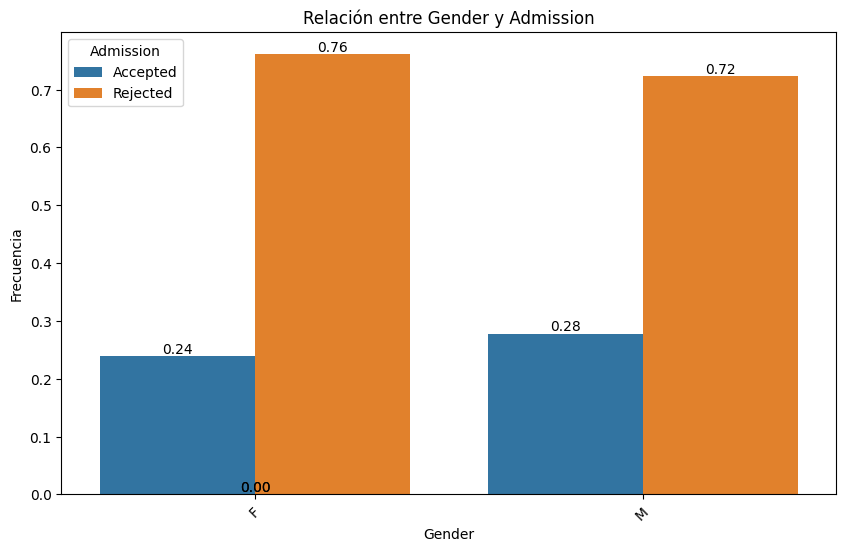

In [4]:
print(' -------------- \n')
print('Paso 0:  Primero ver sus frecuencias individuales')
viz.pinta_distribucion_categoricas(admisiones, ['Major', 'Gender', 'Admission'], relativa=True)

# 1. Escojo la variable directora: MAJOR
print(' -------------- \n')
print('Paso 1:  Escojo la variable directora: MAJOR')

# 2. Muestreo bivariante de cada una de otras dos variables
print(' -------------- \n')
print('Paso 2: Muestreo bivariante de cada una de otras dos variables')
viz.plot_categorical_relationship_fin(admisiones,"Major","Gender", relative_freq= True)
viz.plot_categorical_relationship_fin(admisiones,"Major","Admission", relative_freq= True)
viz.plot_categorical_relationship_fin(admisiones,"Gender","Admission", relative_freq= True)

# 3. Dividir el dataset en tandos subdatasets como valores de "Major": 7
print(' -------------- \n')
print('Paso 3: Dividir el dataset en tandos subdatasets como valores de "Major": 7')
columnas = ['Major', 'Gender', 'Admission'] 
col_directora = "Major"

col_1 = [col for col in columnas if col != col_directora][0]    # Gender
col_2 = [col for col in columnas if col != col_directora][1]    # Admission

diccionario_multivariante = {}
for valor in admisiones[col_directora].unique():    # valor recorrerá 7 valores
    diccionario_multivariante[valor] = admisiones.loc[admisiones[col_directora] == valor, [col_1, col_2]]

print(diccionario_multivariante)  # El orden es porque quiero ver para cada carrera como es la distribución de admisión


# 4. Hago un análisis bivariante para cada subdataset y comparo todo
print(' -------------- \n')
print('Paso 4: Hago un análisis bivariante para cada subdataset y comparo todo')
for valor, df_datos in diccionario_multivariante.items():
    print(f"Department: {valor}:")
    viz.plot_categorical_relationship_fin(df_datos, col_1, col_2, relative_freq= True)

Ahora es más sencillo leer los datos.
- En lineas generales las mujeres son un 10% más rechazadas que los hombres
- Pero de las últimas gráficas parece que se las rechaza un 10% menos en el departamento de física y astronomía, respecto a los hombres

### Ejercicio 3

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [5]:
# Cargar fichero
tips = pd.read_csv('./data/tips.csv',
                         index_col=0)
display(tips)

# Información numérica
display(tips.describe())

# Distinguir las clases de grupo
display(ds.get_cardinality_class(tips, 10, 20))

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


,Card,%_Card,Tipo,Clase
total_bill,229,93.852459,float64,Numérica Continua
tip,123,50.409836,float64,Numérica Continua
sex,2,0.819672,object,Binaria
smoker,2,0.819672,object,Binaria
day,4,1.639344,object,Categórica
time,2,0.819672,object,Binaria
size,6,2.459016,int64,Categórica


### Ejercicio 4

Realiza una análisis de todas las posibles correlaciones dos a dos, de forma numérica primero y luego empleado un heatmap y un pairplot de seaborn. ¿Qué variables tienen o aparentemente tienen una mayor correlación con "total?

(3, 2)


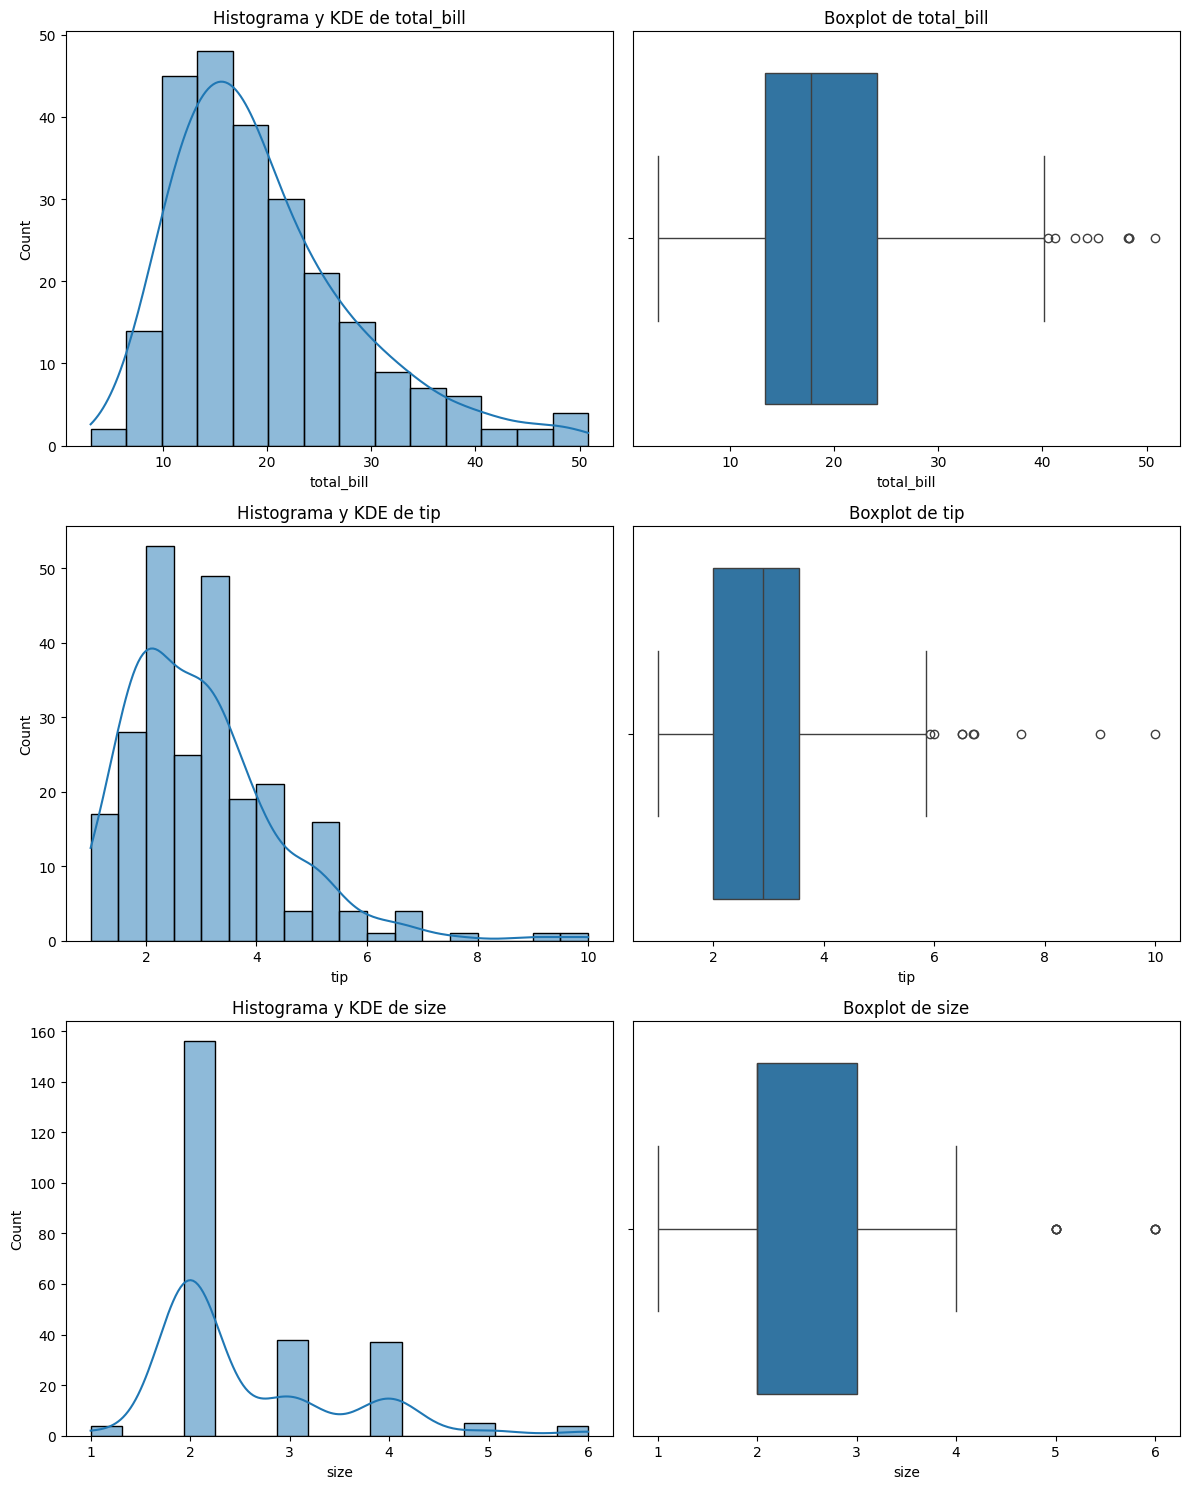

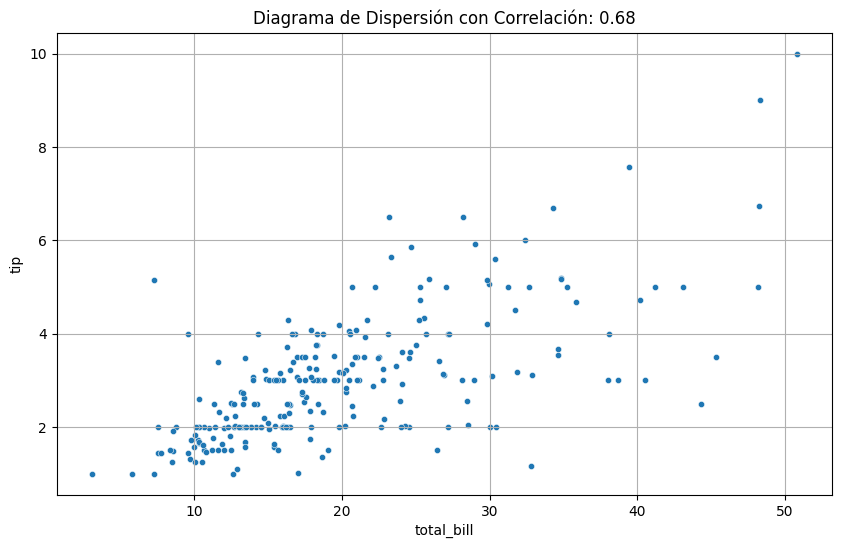

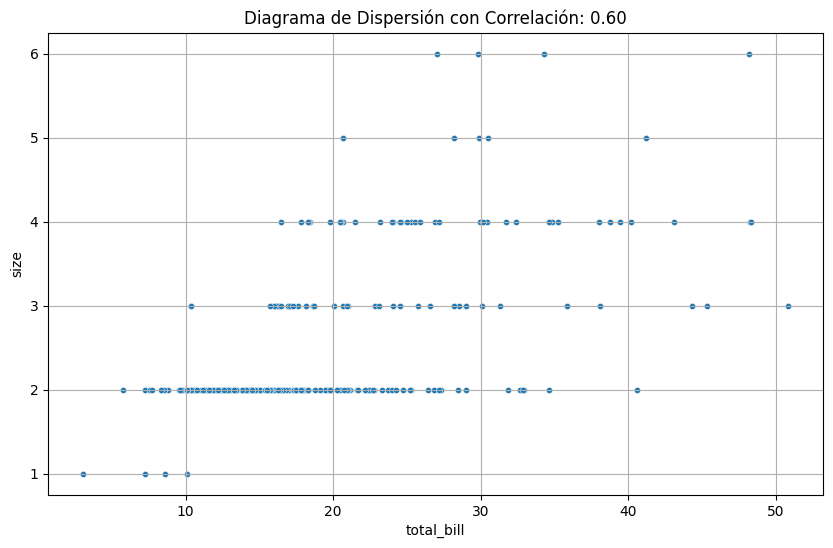

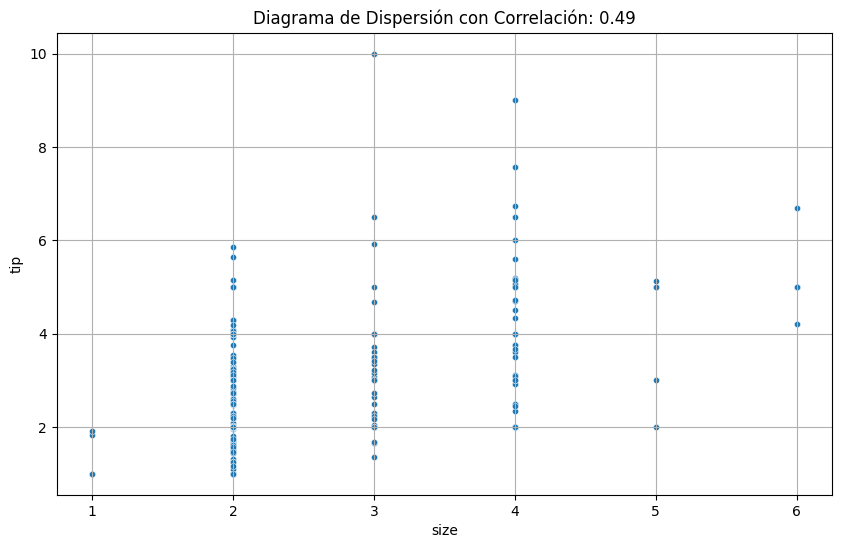

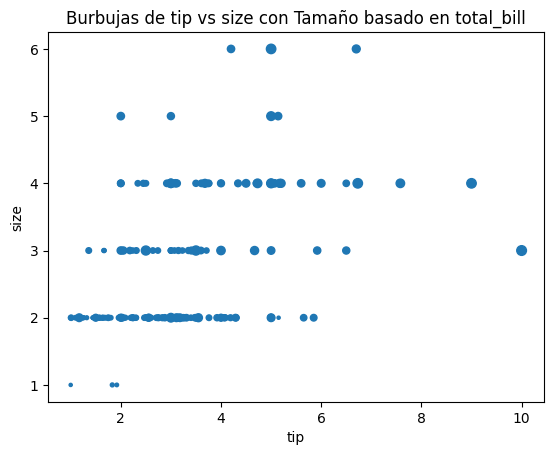

In [6]:
# Las varaibles númericas de este dataset son "total_bill", "tip", y podemos incluir "size"

# 1. Análisis histograma, KDE y plot-box
viz.plot_combined_graphs(tips,["total_bill", "tip", "size"])

# 2. Mostrar correlaciones y dispersiones dos a dos
viz.grafico_dispersion_con_correlacion(tips,"total_bill", "tip", tamano_puntos= 20)
viz.grafico_dispersion_con_correlacion(tips,"total_bill", "size", tamano_puntos= 20)
viz.grafico_dispersion_con_correlacion(tips,"size", "tip", tamano_puntos= 20)

# 3. Mostrar los tres valores a la vez
viz.bubble_plot(tips, "tip", "size", "total_bill", scale = 1)

Convertiría "size" en categórica. No hace ni falta un bining

Pero continuando con el análisi multivariante seguimos:

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


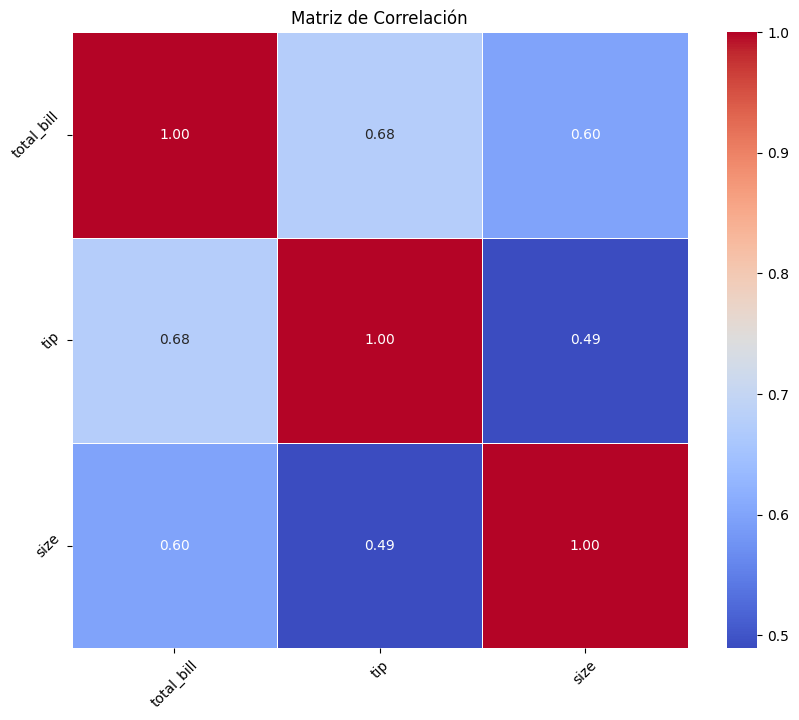

Index(['total_bill', 'tip', 'size'], dtype='object')


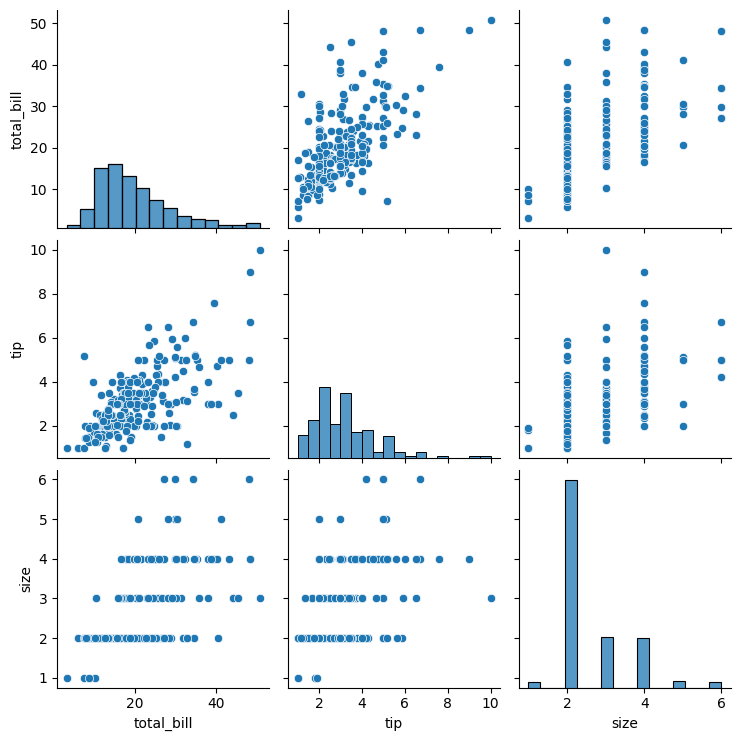

In [11]:
# 1. Matriz de correlación
corr_matrix = tips.corr(numeric_only= True, method='pearson') 
display(corr_matrix)

# 2. Mapa de calor
ds.mapa_calor(corr_matrix)

# 3. Todos los diagramas de dispersión
tips_numeric_col = tips.select_dtypes(include = ["float","int"])
print(tips_numeric_col.columns)
sns.pairplot(tips_numeric_col)
plt.show()


### Ejercicio 5

Carga el dataset de accidentes que conoces de la unidad anterior y que se encuentra en la ruta "./data/car_crashes.csv", deshazte de las columnas innecesarias y renombra la que contiene las iniciales de los estados a "state"


In [16]:
car_crashes = pd.read_csv('./data/car_crashes.csv',
                          sep = '|',
                          index_col=0)

# Quiero convertir las siguientes columnas en valores absolutos (porque
# se del anterior workout que vienen dados en porcentaje)
# Cuidado porque está en tanto por ciento, y hay que pasarlo a tanto por 1
columns = ['speeding', 'alcohol', 'not_distracted', 'no_previous']
car_crashes[columns] = car_crashes[columns].apply(lambda x: x / 100 * car_crashes['total'])

car_crashes.rename(columns={'abbrev' : 'state'}, inplace=True)
car_crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state
0,18.8,1.378416,1.060320,3.393024,2.827520,784.55,145.08,AL
1,18.1,1.343201,0.819025,2.948490,3.079534,1053.48,133.93,AK
2,18.6,1.210860,0.968688,2.906064,3.321216,899.47,110.35,AZ
3,22.4,0.903168,1.304576,4.716544,4.766720,827.34,142.39,AR
4,12.0,0.504000,0.403200,1.310400,1.281600,878.41,165.63,CA


### Ejercicio 6

Realiza un análisis multivariante entre las variables numéricas "total", "alcohol", "speeding". ¿Puedes sacar alguna conclusión interesante?

(3, 2)


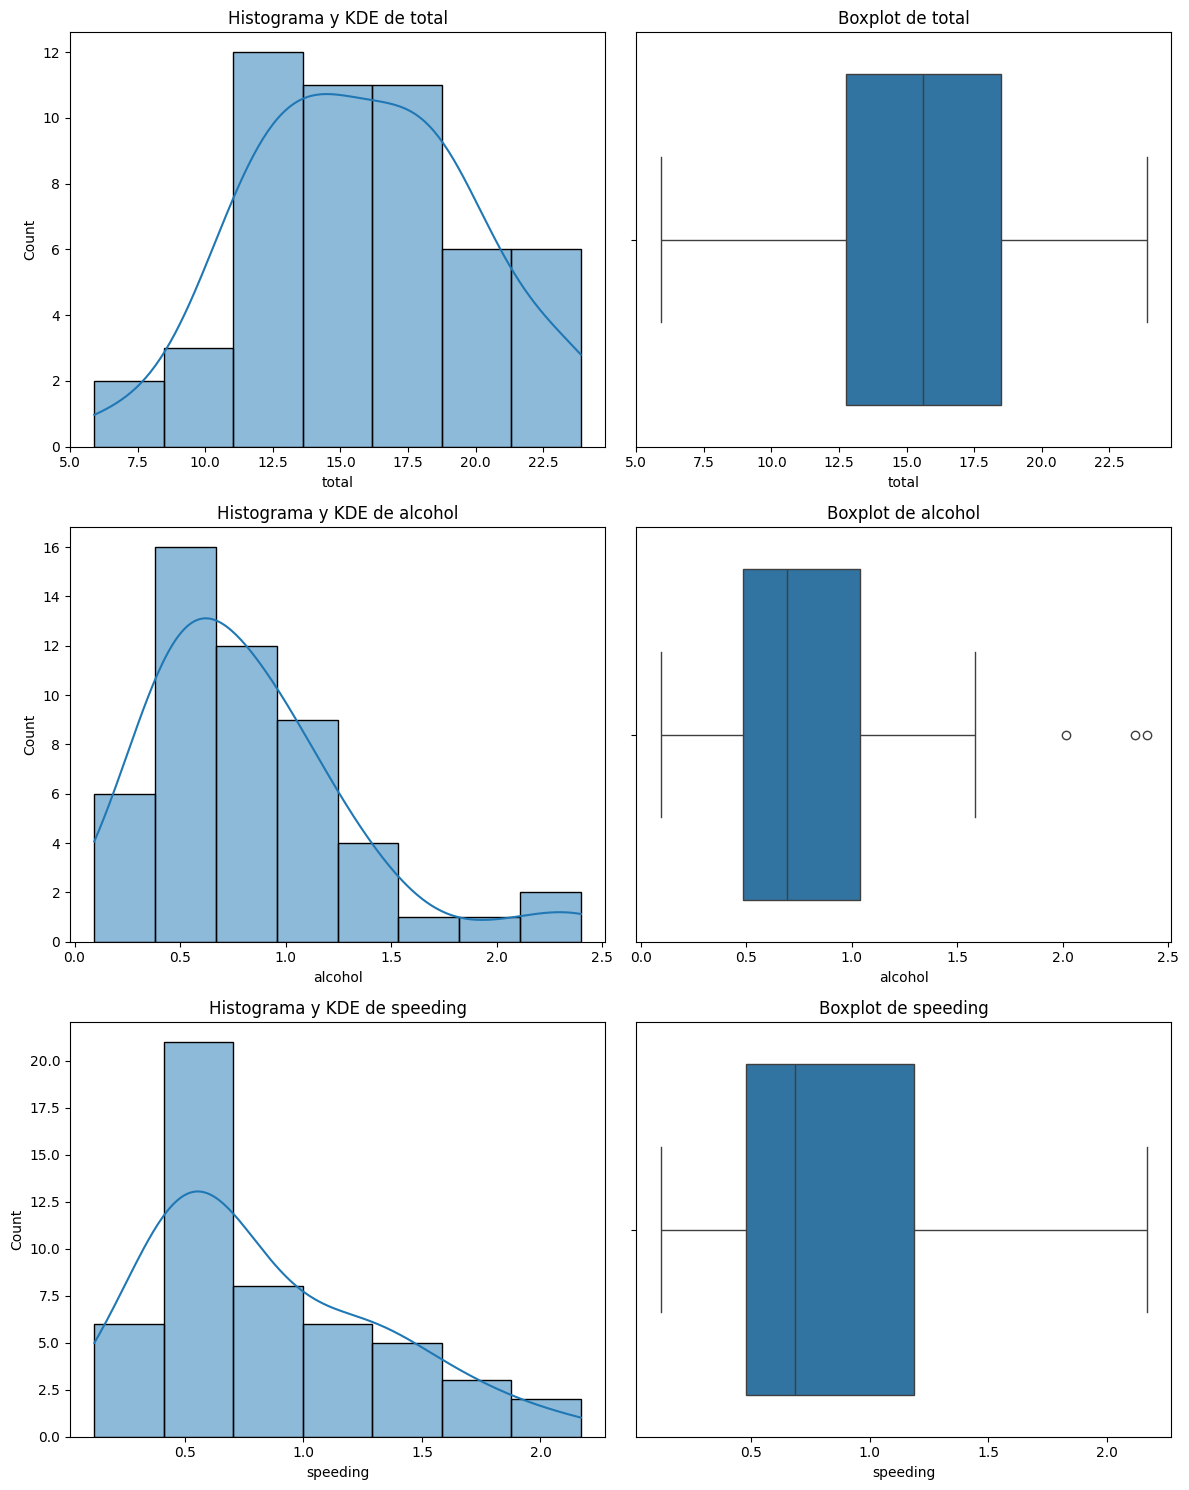

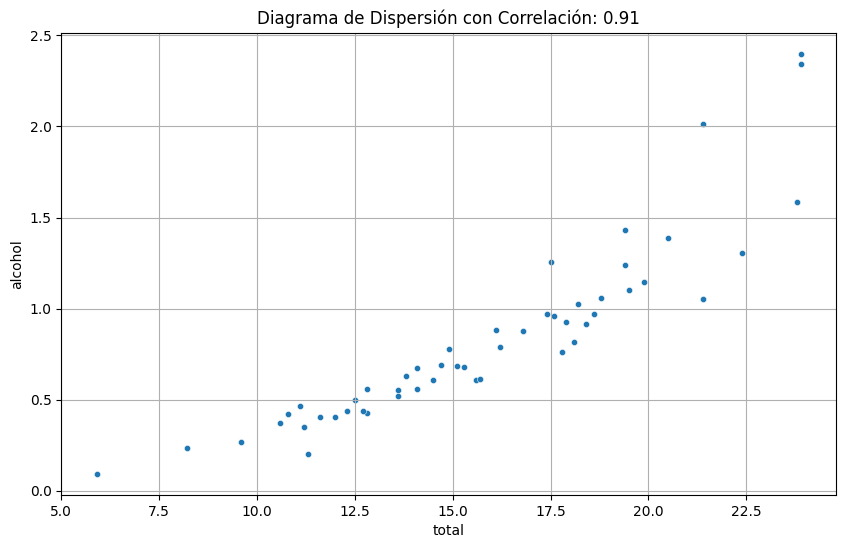

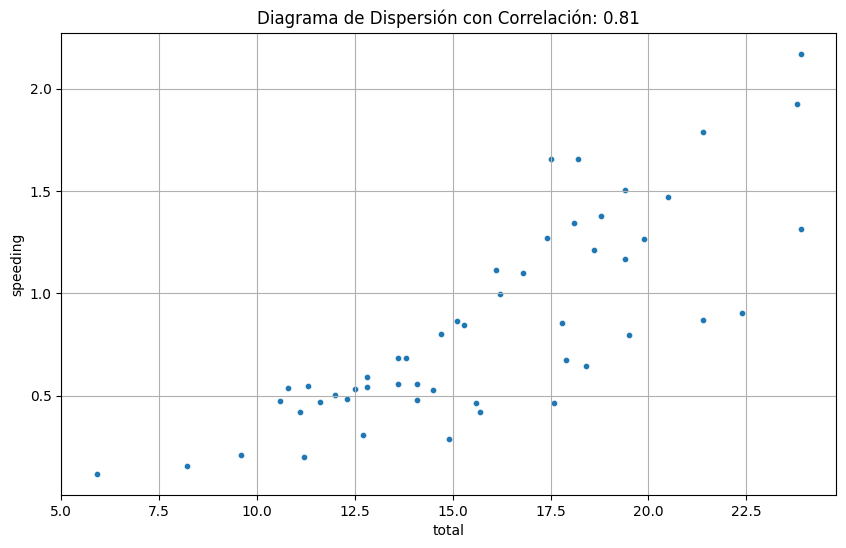

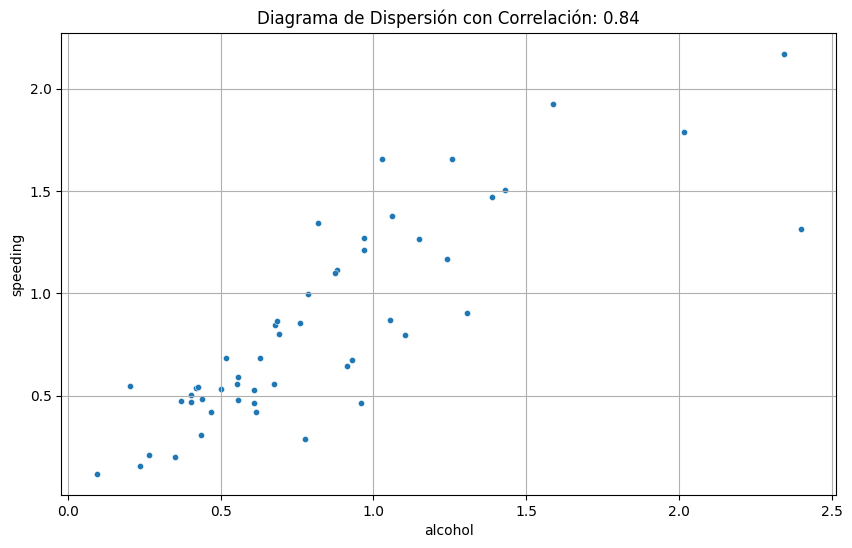

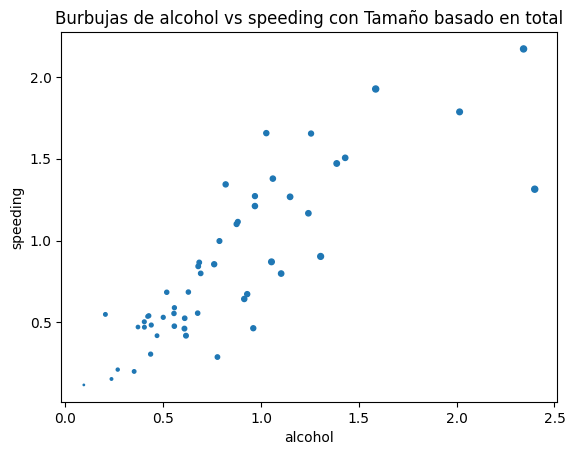

In [17]:
# Las varaibles númericas que vamos usar son "total", "alcohol", y "speeding"

# 1. Análisis histograma, KDE y plot-box
viz.plot_combined_graphs(car_crashes, ["total", "alcohol", "speeding"])

# 2. Mostrar correlaciones y dispersiones dos a dos
viz.grafico_dispersion_con_correlacion(car_crashes,"total", "alcohol", tamano_puntos= 20)
viz.grafico_dispersion_con_correlacion(car_crashes,"total", "speeding", tamano_puntos= 20)
viz.grafico_dispersion_con_correlacion(car_crashes,"alcohol", "speeding", tamano_puntos= 20)

# 3. Mostrar los tres valores a la vez
viz.bubble_plot(car_crashes, "alcohol", "speeding", "total", scale = 1)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.808887,0.905227,0.915665,0.979073,-0.199702,-0.036011
speeding,0.808887,1.000000,0.836526,0.805087,0.791343,-0.081587,-0.053456
alcohol,0.905227,0.836526,1.000000,0.891644,0.905465,-0.153994,-0.105592
not_distracted,0.915665,0.805087,0.891644,1.000000,0.910242,-0.158665,-0.064068
no_previous,0.979073,0.791343,0.905465,0.910242,1.000000,-0.125933,-0.006549
ins_premium,-0.199702,-0.081587,-0.153994,-0.158665,-0.125933,1.000000,0.623116
ins_losses,-0.036011,-0.053456,-0.105592,-0.064068,-0.006549,0.623116,1.000000


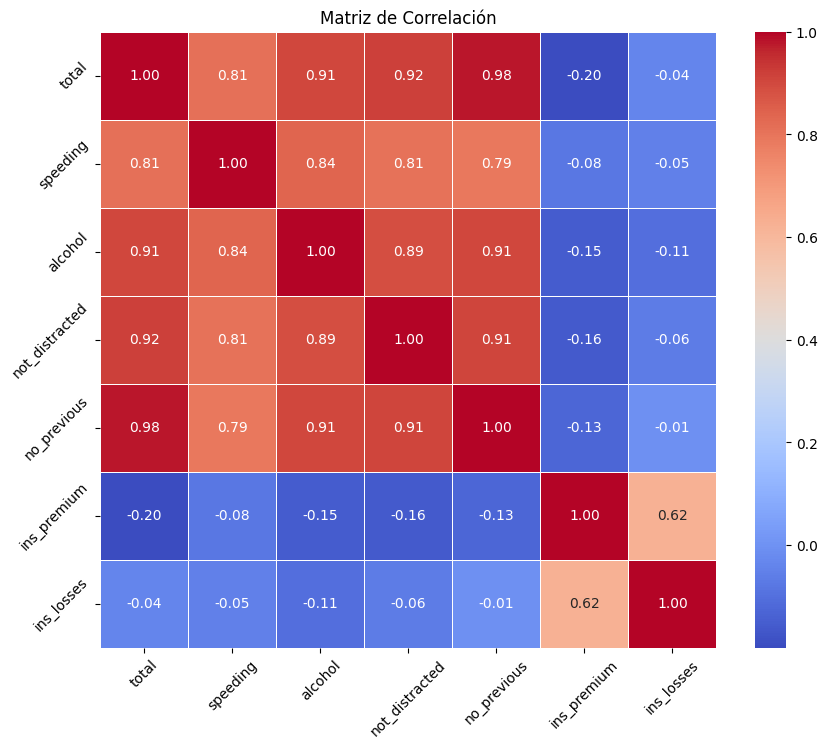

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses'],
      dtype='object')


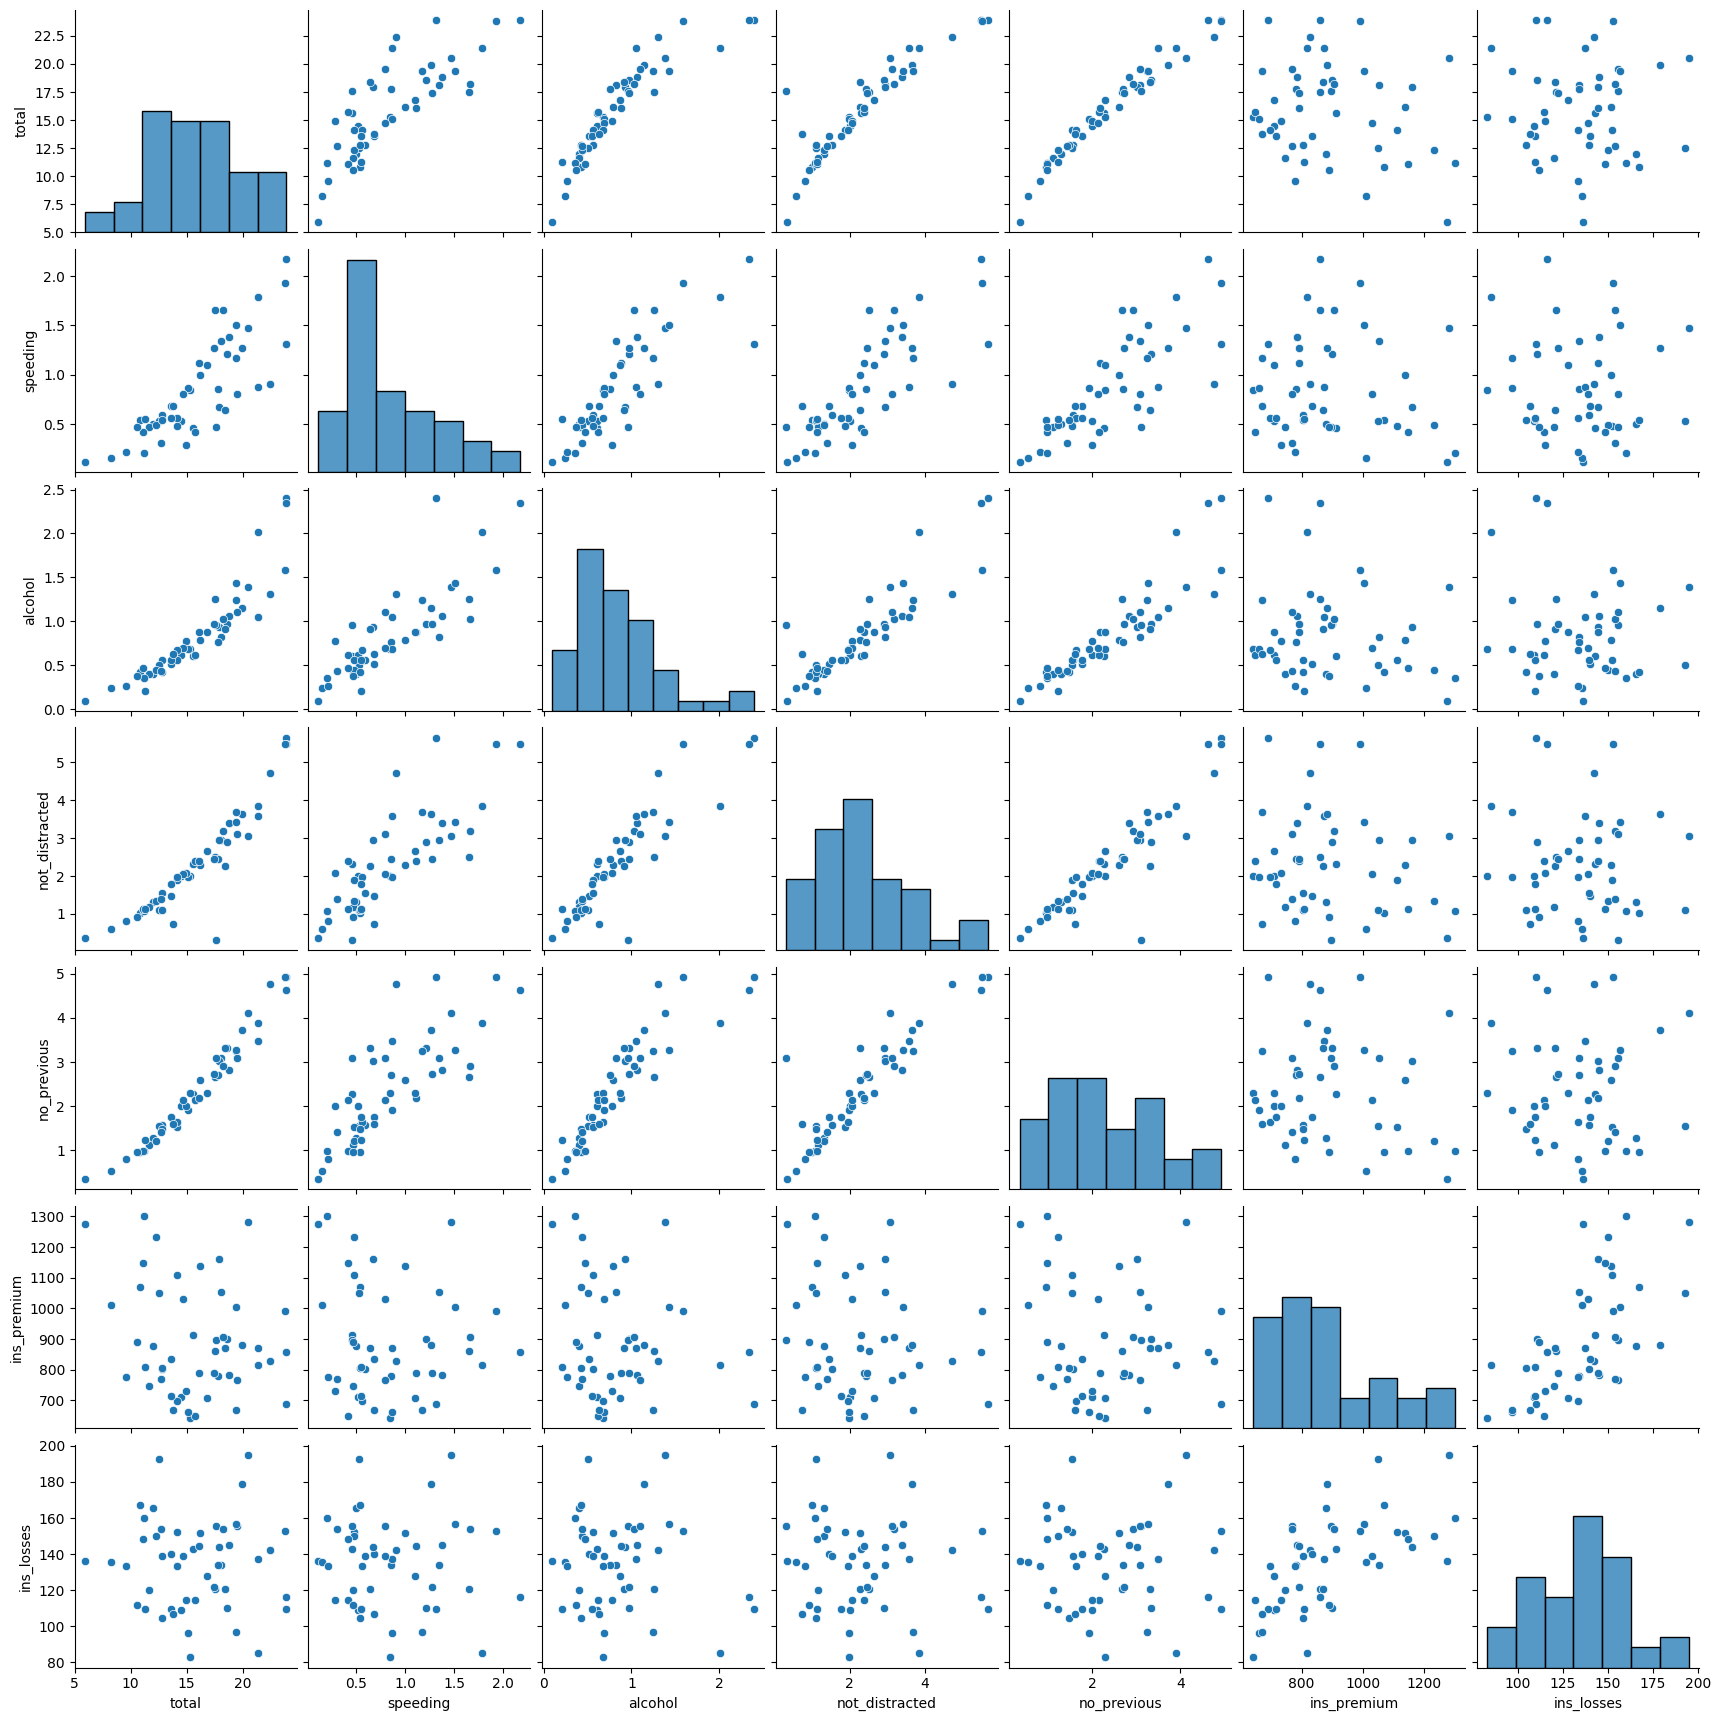

In [18]:
# 1. Matriz de correlación
corr_matrix = car_crashes.corr(numeric_only= True, method='pearson') 
display(corr_matrix)

# 2. Mapa de calor
ds.mapa_calor(corr_matrix)

# 3. Todos los diagramas de dispersión
cars_numeric_col = car_crashes.select_dtypes(include = ["float"])
print(cars_numeric_col.columns)
sns.pairplot(cars_numeric_col)
plt.show()